# 1. Problem Statement

We have a datasets of Houses that have been already sold. 

We have to model using the dataset and figure out prices for a given features of a house.

# 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.max_columns = 100
pd.options.display.max_rows = 2000

from sklearn.model_selection import train_test_split
import sklearn

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import L2
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam

Using tensorflow for modelling;

the major advantage of using it is not having to manually feature enginner and select different feature to reduce multicollinearity between features.
<br>Tensorflow will automatically do it inside hidden layers.

# 3. Getting train dataset

The following dataset is obtained from Kaggle datasets collection.

In [2]:
raw_train = pd.read_csv('train.csv')

# 4. Descriptive Analysis

In [3]:
raw_train.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

figuring out which feature is important and planning for features in this stage.

Some Egs:

1. Id is pretty much unusable for our modelling


2. MSZoning has RL as value for 1151 rows in 1460 rows.
<br>There is no any variation of data as majority of it is RL. 
<br>We do not get information from this


3. Lot Area looks good as a numerical variable but has very high max value compared to different quartiles. Thus, contains outliers.

# 5. Univariate Analysis

In [4]:
raw_train.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [5]:
raw_train.LotArea.quantile(0.99)

37567.64000000021

df from the markdown is one which doesnt have any chatagorical features.

I just used it to test during the first run.

df = raw_train[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea',
                'TotRmsAbvGrd', 'GarageArea' 'SalePrice']]

In [6]:
df = raw_train[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd','GarageArea',
                'Neighborhood', 'HouseStyle', 'Foundation', 
                'SalePrice']]

In [7]:
df = df[df['LotArea']<df['LotArea'].quantile(0.99)]
df = df[df['TotalBsmtSF']<df['TotalBsmtSF'].quantile(0.99)]
df = df[df['GrLivArea']<df['GrLivArea'].quantile(0.99)]
df = df[df['GarageArea']<df['GarageArea'].quantile(0.99)]
df = df[df['SalePrice']<df['SalePrice'].quantile(0.99)]

The code above is used for Removing outliers and making the feature have a Normal Distribution.

Note that removing such outlier which is in very small amount does not make our model bad.

# 6. Bi-variate Analysis

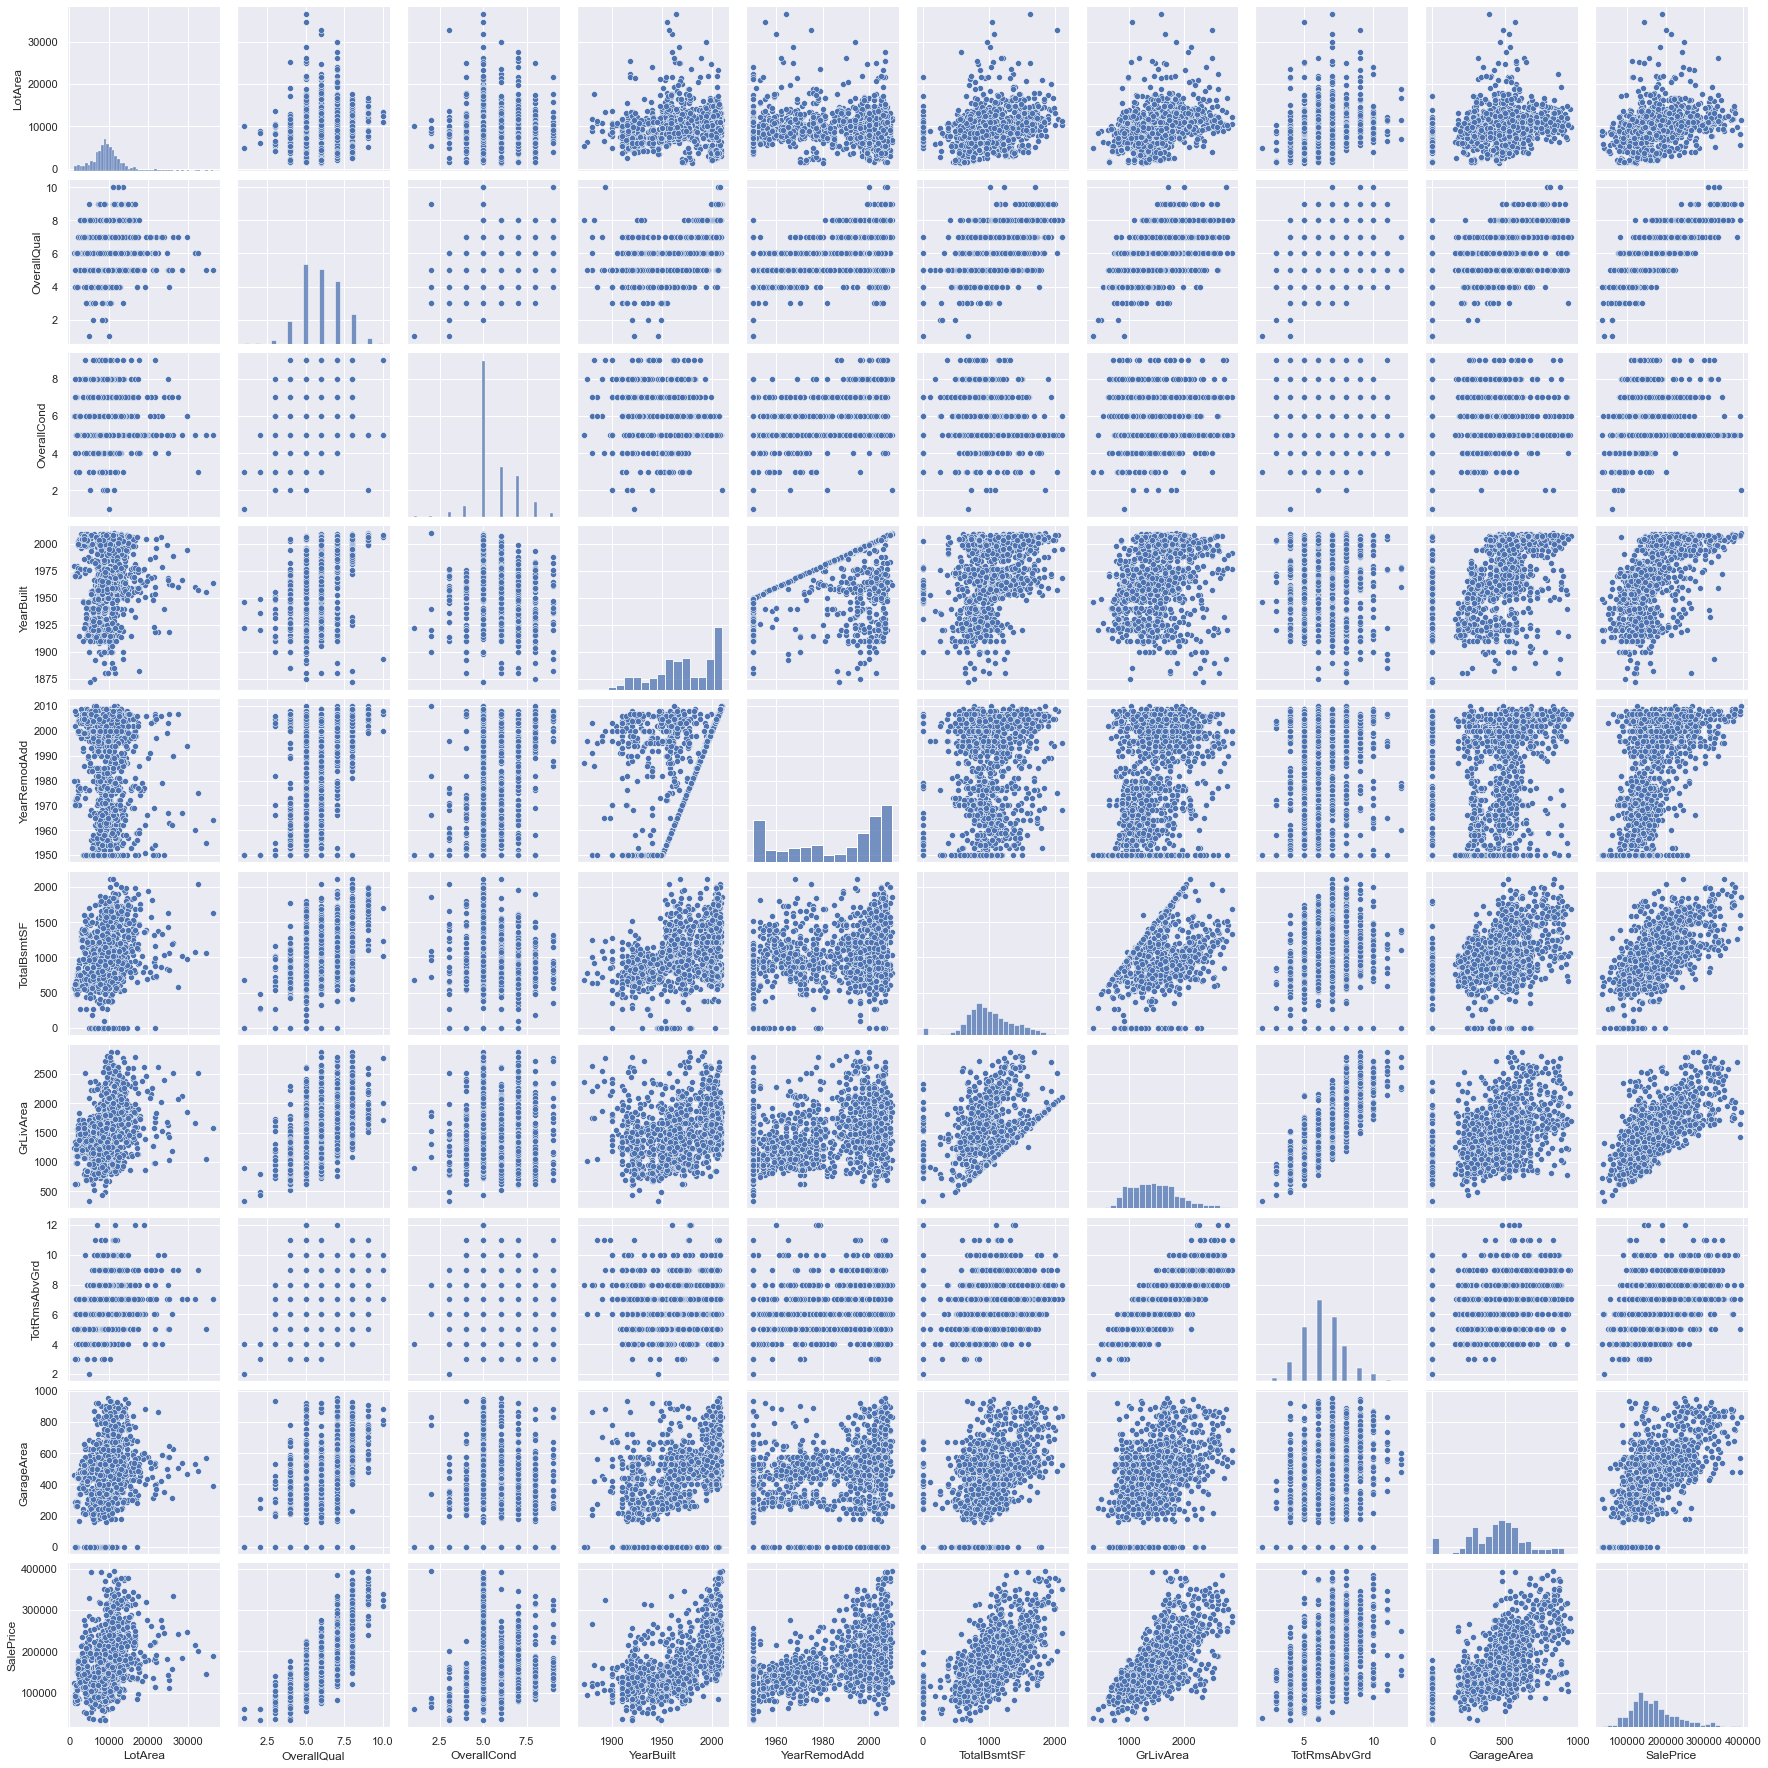

In [8]:
sns.pairplot(df)

This pair plot is used to see the distribution of numerical variable along its diagonal.

And The SalePrice row helps to determine how strongly dependent is SalePrice on different numerical features.

We could use boxplots for bivavariate analysis of catagorical features.

___
### After bivariate analysis, we usually do multi variate analysis in which we look for multicollinearity of different features and try to select features in such a way that multicollinearity is minimized to reasonable degree

We don't have to do this as we are using Neural Network for out modelling.

# 7. Preprocessing before modelling

## encoding categorical values

In [9]:
df_encoded = pd.get_dummies(df, drop_first = True)

In [10]:
df_encoded = df_encoded.drop('HouseStyle_2.5Fin', axis = 1)

Changing the catagorical values. (Kind of like one-hot-encoding)

HouseStyle_2.5Fin is droped as it is not contained on test set.
<br>As all the input for the model should have same dimension.

## train-test split

In [11]:
targets = df_encoded[['SalePrice']]
inputs = df_encoded.drop('SalePrice', axis = 1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets,
                                                    train_size = 0.7,
                                                   random_state = 128)

[]

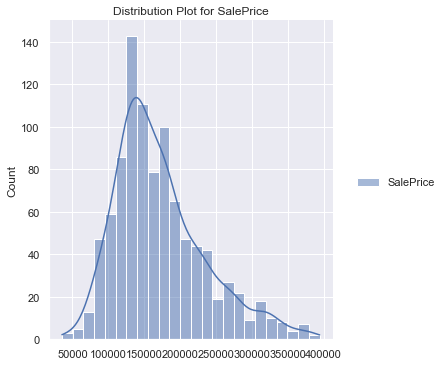

In [13]:
sns.displot(y_train,kde=True).set(title = 'Distribution Plot for SalePrice')
plt.plot()

conntains a bit skewness but is pretty good for modelling.

# 8. Modeling and fitting

using large neurals can overfit. So, careful on that part.

Reducing the Neurals on Hidden layer will help or use of regularization.
<br>Check for overfitting or bais is done in Accuary part of this notebook below.

In [14]:
model = Sequential([
    Dense(5, activation = 'relu'),
    Dense(1, activation = 'linear')
])
model.compile(loss = 'mean_squared_error',
             optimizer = Adam(learning_rate = 0.01))

model.fit(x_train, y_train,
         epochs = 1000,
         validation_split = 0.05,
         callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
         )

Epoch 1/1000
29/29 [==============================] - 0s 6ms/step - loss: 32248840192.0000 - val_loss: 37488742400.0000
Epoch 2/1000
29/29 [==============================] - 0s 2ms/step - loss: 28520970240.0000 - val_loss: 31530489856.0000
Epoch 3/1000
29/29 [==============================] - 0s 2ms/step - loss: 21977094144.0000 - val_loss: 22862350336.0000
Epoch 4/1000
29/29 [==============================] - 0s 2ms/step - loss: 14167883776.0000 - val_loss: 14060160000.0000
Epoch 5/1000
29/29 [==============================] - 0s 2ms/step - loss: 7826392576.0000 - val_loss: 7956458496.0000
Epoch 6/1000
29/29 [==============================] - 0s 2ms/step - loss: 4541436416.0000 - val_loss: 5239187968.0000
Epoch 7/1000
29/29 [==============================] - 0s 2ms/step - loss: 3574818560.0000 - val_loss: 4477469696.0000
Epoch 8/1000
29/29 [==============================] - 0s 2ms/step - loss: 3406815744.0000 - val_loss: 4285684480.0000
Epoch 9/1000
29/29 [============================

Epoch 70/1000
29/29 [==============================] - 0s 2ms/step - loss: 1363582848.0000 - val_loss: 1495003264.0000
Epoch 71/1000
29/29 [==============================] - 0s 2ms/step - loss: 1350453632.0000 - val_loss: 1459216256.0000
Epoch 72/1000
29/29 [==============================] - 0s 2ms/step - loss: 1339284736.0000 - val_loss: 1479402368.0000
Epoch 73/1000
29/29 [==============================] - 0s 2ms/step - loss: 1326454912.0000 - val_loss: 1438443008.0000
Epoch 74/1000
29/29 [==============================] - 0s 2ms/step - loss: 1315676672.0000 - val_loss: 1424855296.0000
Epoch 75/1000
29/29 [==============================] - 0s 2ms/step - loss: 1314419328.0000 - val_loss: 1396221440.0000
Epoch 76/1000
29/29 [==============================] - 0s 2ms/step - loss: 1299388032.0000 - val_loss: 1458279040.0000
Epoch 77/1000
29/29 [==============================] - 0s 2ms/step - loss: 1295606528.0000 - val_loss: 1414571008.0000
Epoch 78/1000
29/29 [===========================

# 9. Accuracy

In [15]:
a = model.history.history['loss'][-6]
b = model.history.history['val_loss'][-6]
print(f'RMSE of train set: {np.sqrt(a).round(3)}')
print(f'RMSE of validation set: {np.sqrt(b).round(3)}')

RMSE of train set: 34059.363
RMSE of validation set: 34923.608


RMSE for training set looks good. Its about 40 % of standard deviation.

RMSE for validation set looks slightly higher than training set. 
<br>Does not look overfitted.

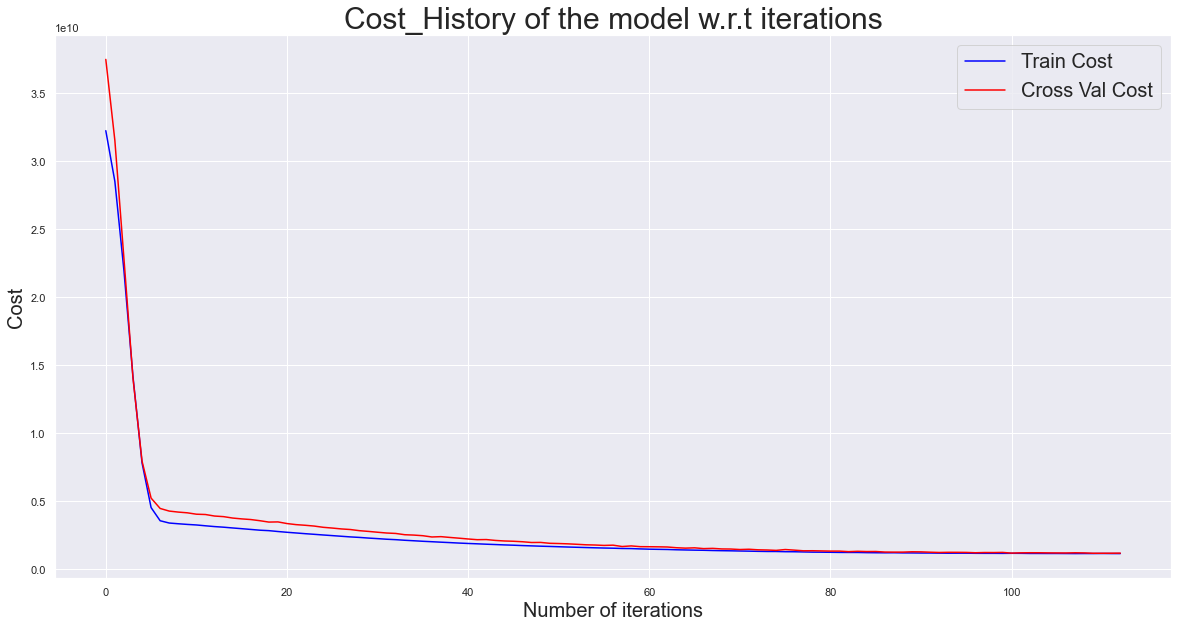

In [16]:
fig, ax = plt.subplots(figsize = (20,10))
ax = plt.plot(model.history.history['loss'], color = 'Blue')
ax = plt.plot(model.history.history['val_loss'], color = 'red')
plt.title('Cost_History of the model w.r.t iterations', fontsize = 30)
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Cost', fontsize = 20)
plt.legend(['Train Cost', 'Cross Val Cost'], fontsize = 20)
plt.show()

In [17]:
y_hat = model.predict(x_train)

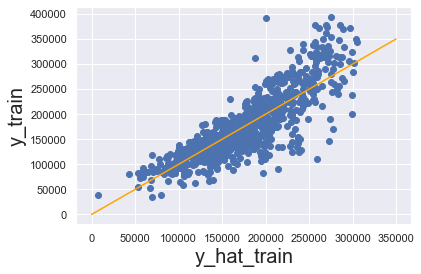

In [18]:
plt.scatter(y_hat, y_train)

x = np.linspace(0,350000, 2)
plt.plot(x,x, color = 'orange')
plt.ylabel('y_train', fontsize = 20)
plt.xlabel('y_hat_train', fontsize = 20)
plt.show()

In [19]:
np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_hat))

34006.50346531966

## Check with labeled test data

In [20]:
y_hat_labeled = model.predict(x_test)

Text(0.5, 0, 'y_hat_test')

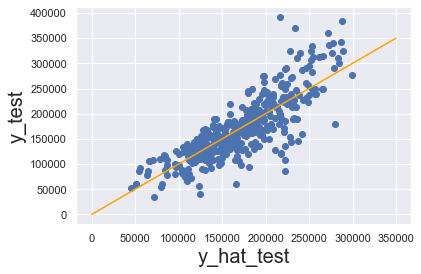

In [21]:
plt.scatter(y_hat_labeled, y_test)

x = np.linspace(0,350000, 2)
plt.plot(x,x, color = 'orange')
plt.ylabel('y_test', fontsize = 20)
plt.xlabel('y_hat_test', fontsize = 20)

In [22]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_hat_labeled))

35537.85989198402

This could be named as test set. It's the first time that the model is seeing this dataset. 

Looks good enough with RMSE slightly higher than train set.
<br>Again, does not look overfitted.

In [23]:
raw_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The mean absolute error is just for checking the outliers in the error by comparing with RMSE.

As RMSE panalizes large error much more than MAE.

In [24]:
sklearn.metrics.mean_absolute_error(y_test, y_hat_labeled)

25952.762404221754

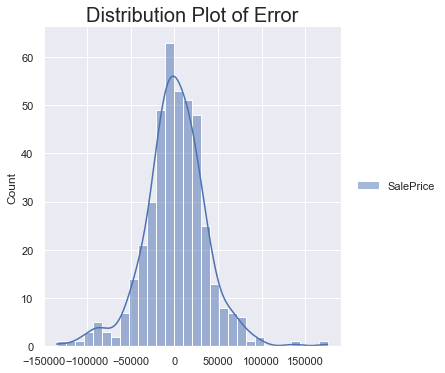

In [25]:
sns.displot(y_test-y_hat_labeled, kde = True)
plt.title('Distribution Plot of Error', fontsize = 20)
plt.show()